## Introduction to Linear Regression
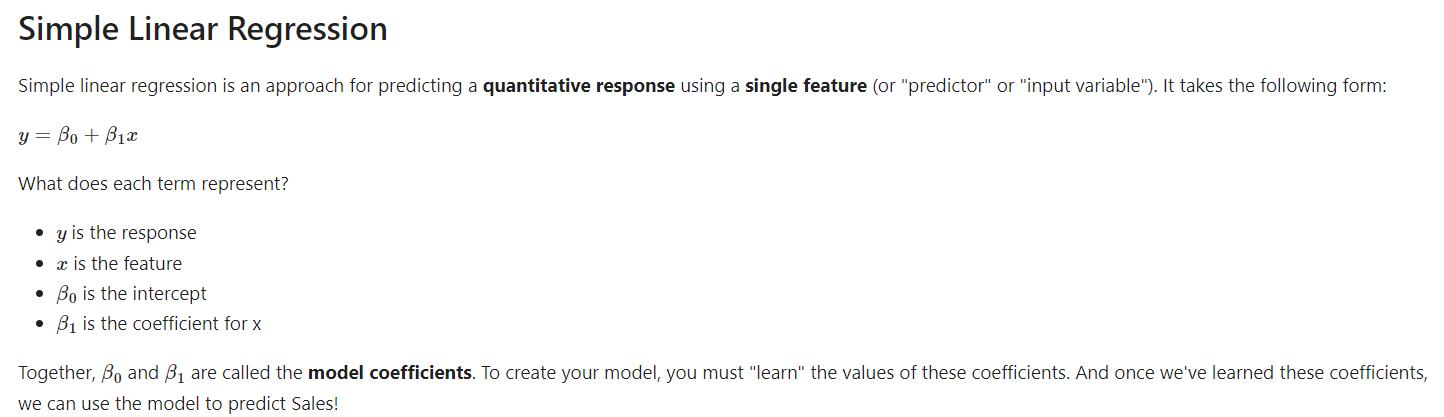

## Estimating Model Coefficients

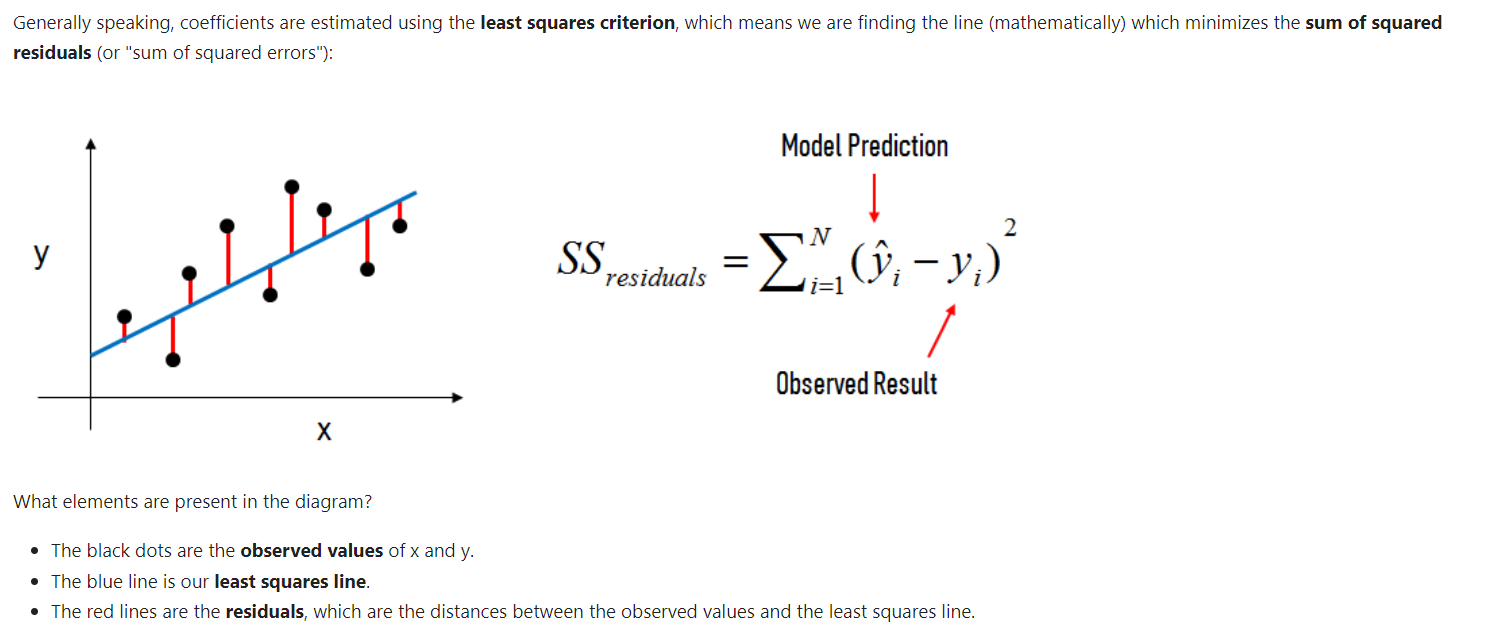

---

### Relation between Model and Coefficients

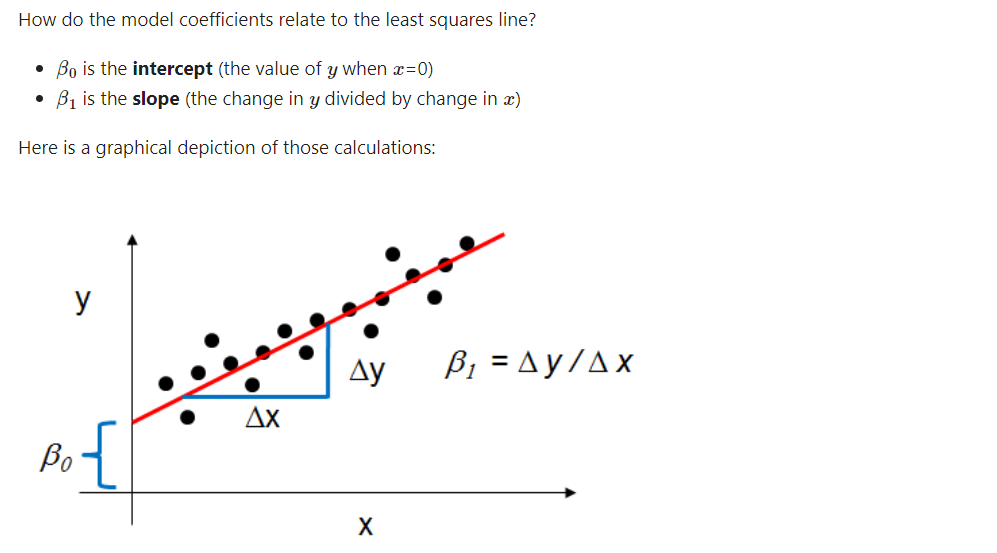

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#import statsmodels 
#import statsmodels.formula.api as smf

# Import Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

In [100]:
#conda install -c conda-forge statsmodels

In [137]:
df=pd.read_csv('Ecommerce Customers.csv')

## About Dataset

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

In [21]:
df.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021595,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


In [102]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [103]:
df.drop(['Email','Address','Avatar'],inplace=True,axis=1)

In [104]:
df.shape

(500, 5)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [106]:
df = df.select_dtypes(exclude=['object'])
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## Check for missing values
Missing values in the data results in poor model performance.

In [108]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

---

Our model has no missing values. But if we had missing values, we can deal with them in these main ways

- Getting rid of customers with a lot of missing values in their columns.

- Getting rid of the whole attribute or remove the whole column.

- Setting the missing values to some value (zero, the mean, the median, etc.).

In [109]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [110]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.0,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.0,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.0,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.0,499.31,79.31,256.67,445.04,498.89,549.31,765.52


In [111]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Explore our Target Variable[Yearly Amount Spent]

In [112]:
# Descriptive statistics summary
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

## Assumption 1 - There must be a linear relationship between our independent variables and the dependent variable

This assumption can be verified using a pairwise scatter plot.

In [113]:
import seaborn as sns

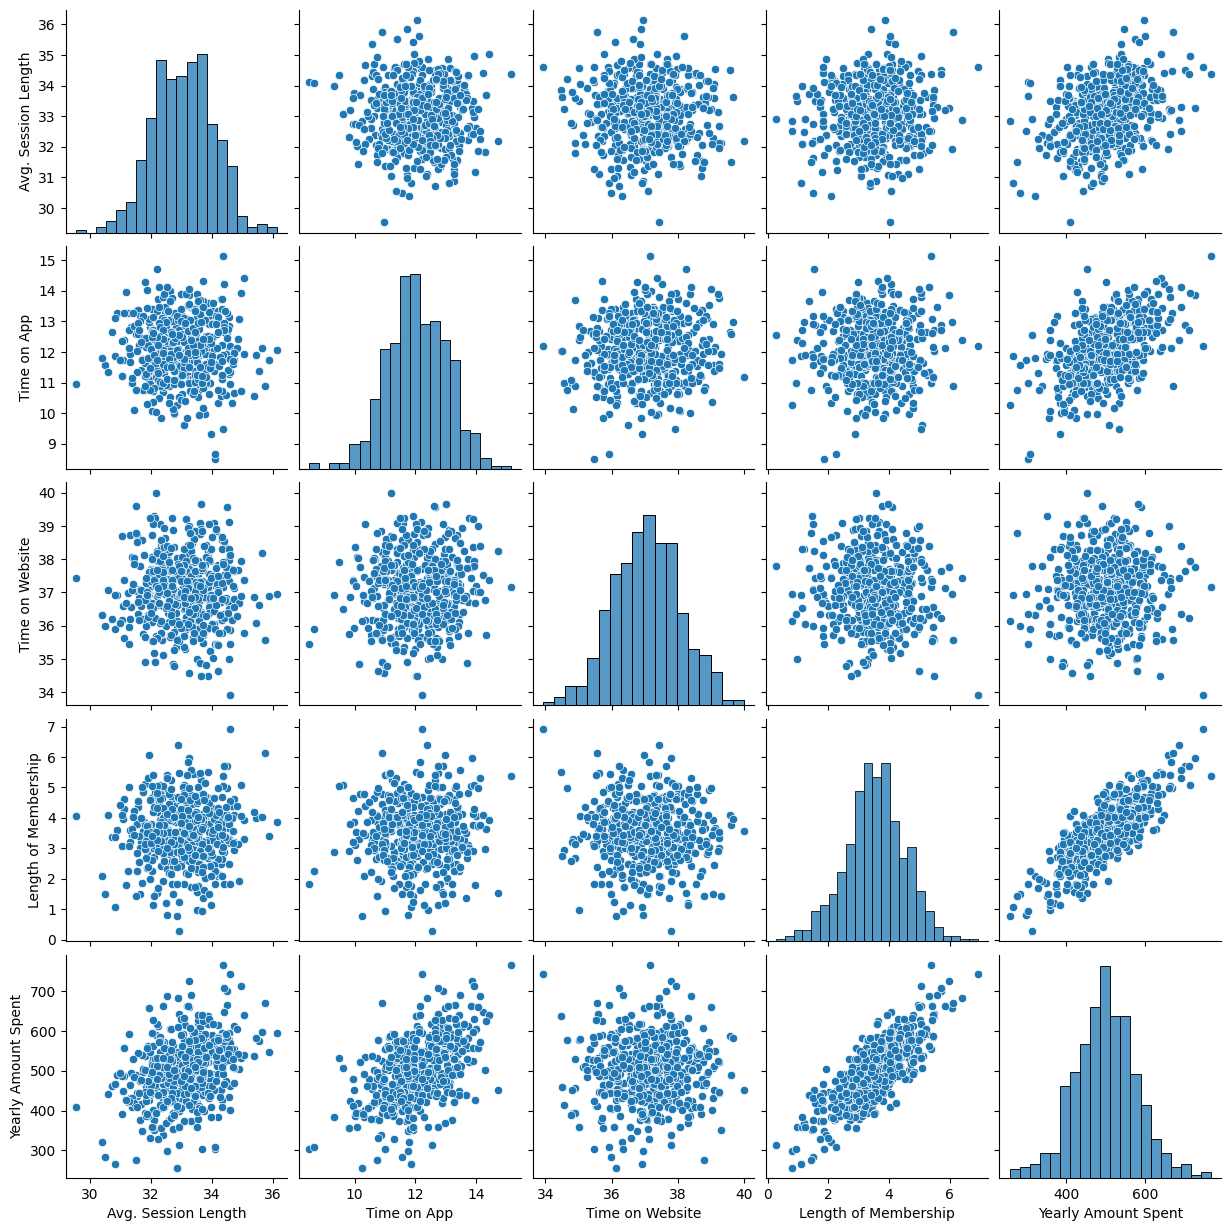

In [114]:
# create a scatter plot
sns.pairplot(df)

## Detect Outliers
An outlier represents a data point that is too small or large. It can influence the model by inflating error rates. If there are outliers in the data, remove them, or replace them with the mean value or median value.



In [115]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.0,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.0,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.0,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.0,499.31,79.31,256.67,445.04,498.89,549.31,765.52


In [116]:
len(df.columns)

5

<AxesSubplot:xlabel='Time on Website'>

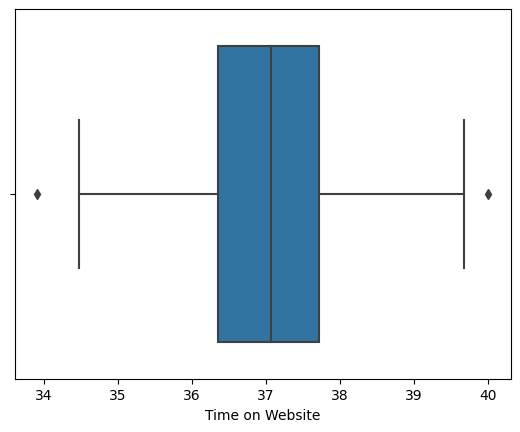

In [117]:
# checking outliers
sns.boxplot(x=df['Time on Website'])

In [118]:
len(df.columns)

5

In [119]:
df.iloc[:,i]

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

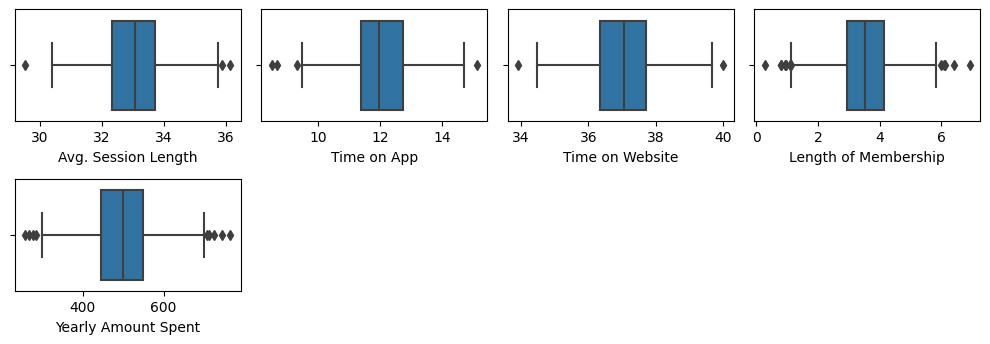

In [120]:
fig = plt.figure(figsize=(10, 15))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(x=df.iloc[:,i])
    
plt.tight_layout()

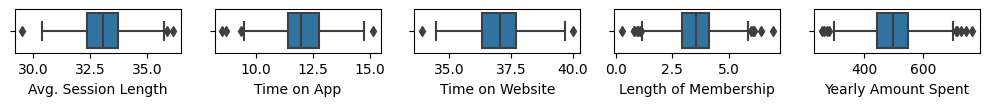

In [121]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(df.columns)):
    fig.add_subplot(15,5,i+1)
    sns.boxplot(x=df.iloc[:,i])
    
    
    
plt.tight_layout()
plt.show()

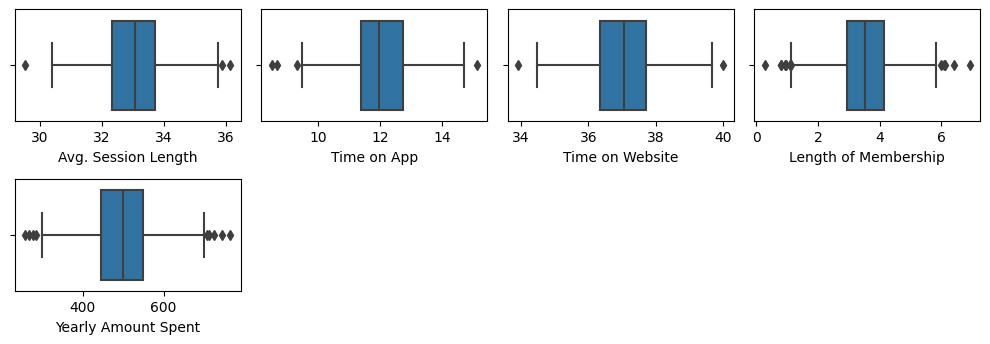

In [122]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(x=df.iloc[:,i])

    
plt.tight_layout()
plt.show()

## Dealing with outliers

To remove noisy data, we are going to remove customers where we have some attribute that is above the 0.999 quantile, highly abnormal datapoint. 

In [123]:
df.drop([])

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [124]:
df.quantile(0.35)

Avg. Session Length      32.639822
Time on App              11.669646
Time on Website          36.673927
Length of Membership      3.202276
Yearly Amount Spent     473.600002
Name: 0.35, dtype: float64

In [125]:
high_quant=df.quantile(0.999)

In [126]:
df.shape

(500, 5)

In [127]:
## dropping outliers greater than 0.99
high_quant = df.quantile(.99)


for i in df.columns:
    df= df.drop(df[i][df[i]>high_quant[i]].index)



From the count output 4 customers have been dropped

## Assumption 2 - Linear regression assumes that our data follows a normal distribution

Regressors assume the data follows a normal distribution (data points are spread symmetrically around the true mean value). If the data is not normal, perform data transformation to reduce its skewness.

Negatively skewed data requires a power transformation or an exponential transformation. In contrast, positively skewed data requires a log transformation or square root transformation. 

## Distribution plot for target variable

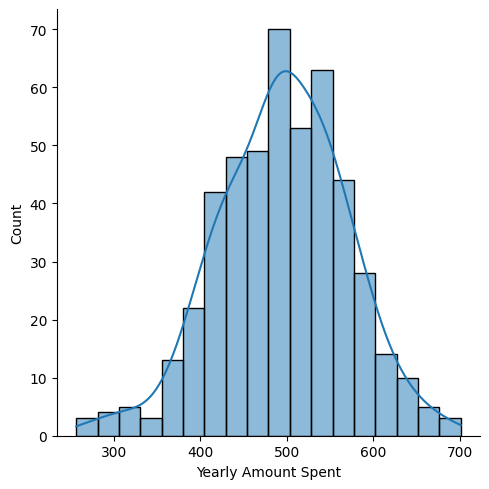

In [128]:
# Use distribution plot to check on the normal distribution
sns.displot(df['Yearly Amount Spent'],kde=True)


## Distribution plots for features

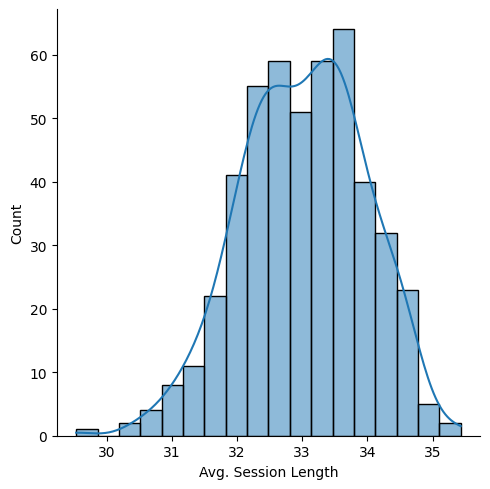

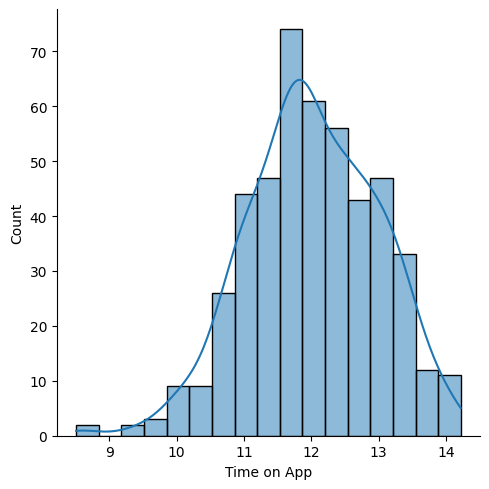

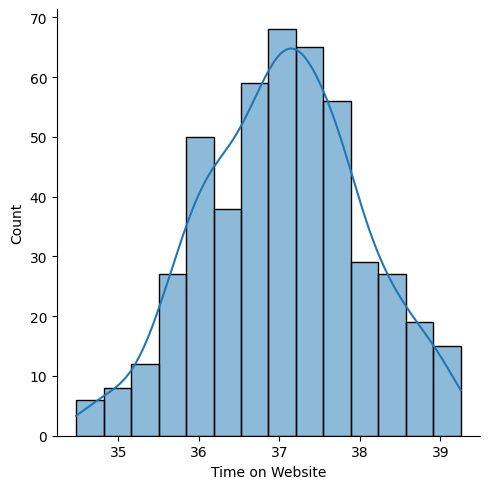

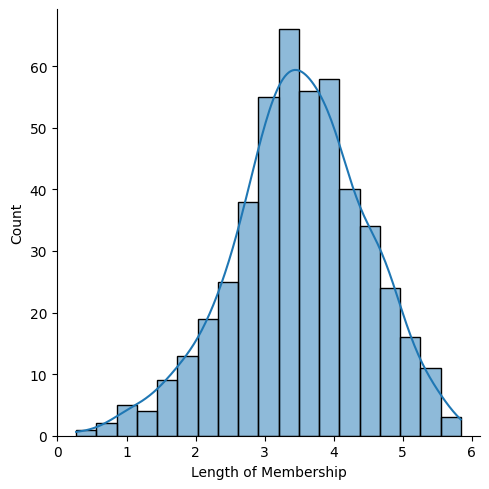

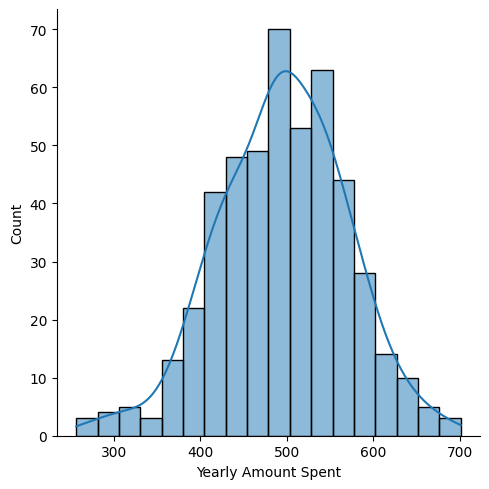

In [129]:
for i in range(len(df.columns)):
    sns.displot(df.iloc[:,i],kde=True)

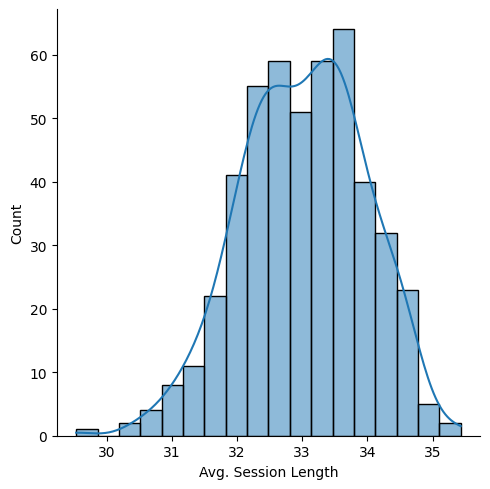

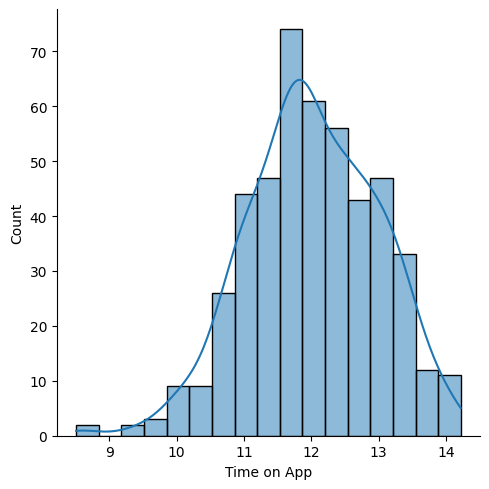

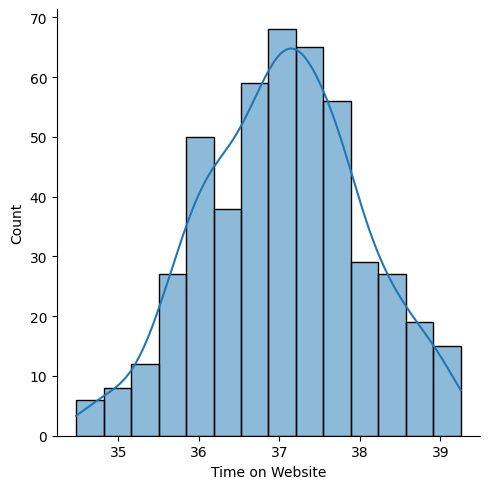

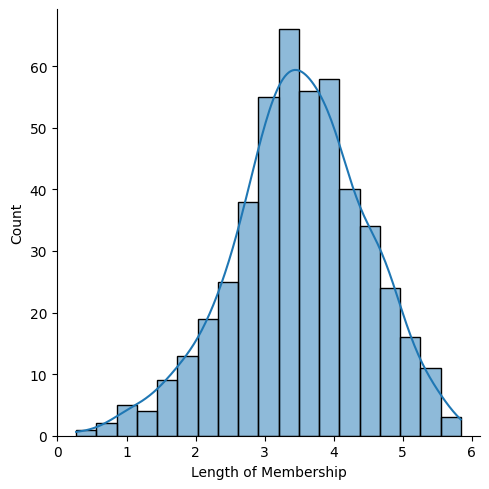

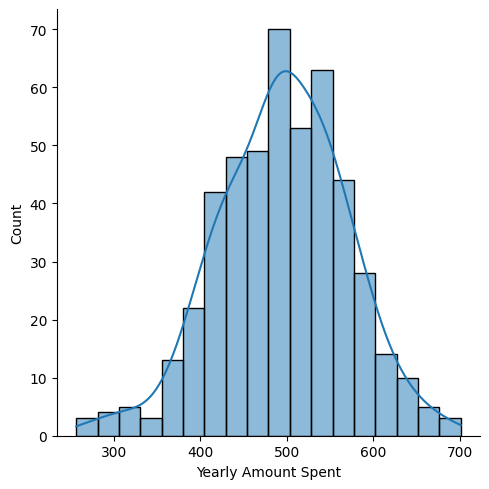

In [130]:
# num = df.select_dtypes(exclude='object').drop(['Yearly Amount Spent',''], axis=1).copy()

for i in range(len(df.columns)):   
    sns.displot(df.iloc[:,i],kde=True)




Our distribution is not skewed which is okay.



## Assumption 3 - There must be no autocorrelation in the residuals. 

Autocorrelation in the residuals of a linear regression model refers to the situation where the residuals (i.e., the differences between the observed values and predicted values) exhibit a pattern of correlation over time or across observations.

In other words, there is a relationship between the errors (residuals) at one time point and the errors at another time point, or between the errors of observations that are close to each other in time or space.

This is a violation of the assumption of independence of errors in linear regression. When there is autocorrelation in the residuals, it means that the model is not able to fully explain the variability in the dependent variable, and there may be other factors affecting the dependent variable that are not included in the model.

Autocorrelation in the residuals can lead to biased estimates of the regression coefficients, incorrect standard errors, and reduced predictive power of the model. To check for autocorrelation, we can use statistical tests such as the Durbin-Watson test or the Breusch-Godfrey test. If autocorrelation is detected, we may need to modify the model or use a different modeling technique that takes into account the autocorrelation in the data.

In [200]:
#!pip install statsmodels

## Assumption 4 - There must be little or no multicollinearity in the data.

Correlation measures the relationship between two variables. When these two variables are so highly correlated that they explain each other (to the point that you can predict the one variable with the other), then we have Collinearity.

## Correlation

Correlation estimates the apparent strength of a linear relationship between an independent variable and a dependent variable. 

There are several methods for determining the correlation between two variables like the Pearson correlation method, Spearman correlation method, and Kendall correlation method.

In [131]:
df.corr(method='kendall')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.019104,-0.011417,-0.011644,0.200356
Time on App,-0.019104,1.000000,0.026773,-0.007521,0.325582
Time on Website,-0.011417,0.026773,1.000000,-0.007626,0.004167
Length of Membership,-0.011644,-0.007521,-0.007626,1.000000,0.577904
Yearly Amount Spent,0.200356,0.325582,0.004167,0.577904,1.000000


In [132]:
df.corr(method='pearson')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.044452,-0.014819,0.005451,0.310491
Time on App,-0.044452,1.000000,0.074773,0.007224,0.495736
Time on Website,-0.014819,0.074773,1.000000,-0.019417,0.022860
Length of Membership,0.005451,0.007224,-0.019417,1.000000,0.796512
Yearly Amount Spent,0.310491,0.495736,0.022860,0.796512,1.000000


<AxesSubplot:>

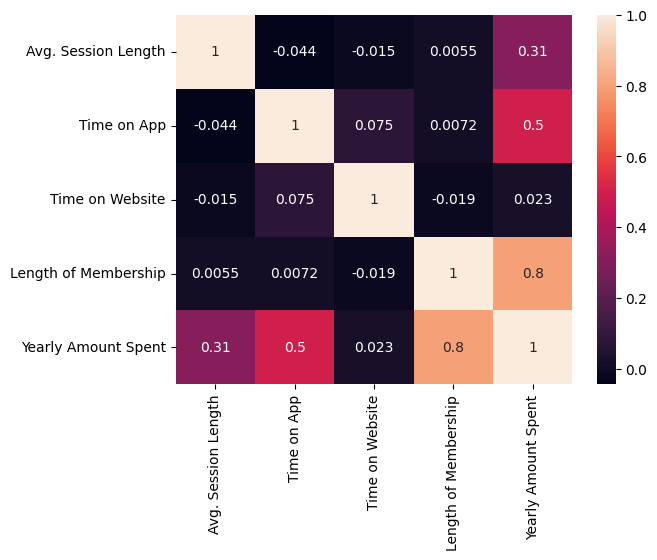

In [133]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

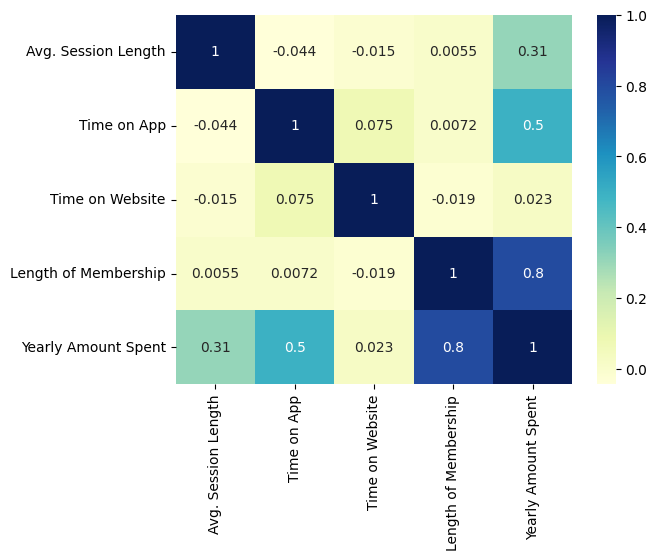

In [134]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [199]:
#corr['Yearly Amount Spent'].sort_values(ascending=False).round(decimals=2)

Length of Membership and TIme on App have the most impact on the Yearly Amount Spent

## Lets now check the correlation between our  independent variables

In [19]:
num = df.select_dtypes(exclude='object').drop(['Yearly Amount Spent'], axis=1)
corr = num.corr(method="pearson")

In [20]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs    

,attribute pair,correlation


We do not have any output and therefore we do not have any variables that are highly correlated with each other and that's the scenario we want.

In [11]:
df.shape

(496, 5)

## Split Data into Training and Test Data

## Split the data into training and test sets using a standard 70/30 split.

 X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.2, this means 70% of observations from your complete data will be used to train/fit the model and rest 30% will be used to test the model.

X_test - This is remaining 30% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

 y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

 y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

In [ ]:
#!pip install sklearn

## Defining our Independent variables X and Dependent Variable y

In [46]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [167]:

#X=df.drop('Yearly Amount Spent',axis=1)
X = df[['Avg. Session Length', 'Time on App','Length of Membership','Time on Website']]
y = df[['Yearly Amount Spent']]


In [168]:
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [214]:
X_train.shape

(400, 4)

In [142]:
y_train.shape

(400, 1)

In [143]:
X_test.shape

(100, 4)

In [144]:
y_test.shape

(100, 1)

## Normalize the Data 

Feature scaling is done to standardize features that greatly vary in magnitude and units.This include : kNN algorithm, kMeans Clustering(Euclidean Distance), Linear Regression, Logistic Regression, and SVM.

In [215]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)

In [171]:
## Confirm scaling has occured

X_train

array([[ 0.72875642, -0.14037638,  0.06519748, -0.17321598],
       [ 1.23367035, -0.23549152, -1.41309514, -0.70076461],
       [-0.44946539,  1.93596148,  0.48362047,  0.16698241],
       ...,
       [-1.26587083, -1.17327098, -0.42804013, -2.08875054],
       [-0.81225043,  2.07956541,  0.18897947,  0.00264921],
       [-0.64425634, -0.61010223, -0.95567649,  0.55038981]])

In [147]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()


X_train=sc.fit_transform(X_train)




C:\Users\ngugi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [216]:
# scale the test variables as well by transforming
X_test=sc.transform(X_test) 

In [180]:
X_test

array([[-0.99713193, -1.71345511, -0.13004556,  1.99174929],
       [-0.25600972,  0.76100262,  0.27616869,  0.01057932],
       [-1.63590714, -1.96022058,  0.65286637,  1.00618723],
       [-0.62010572,  1.40296914, -0.61041721,  0.21450597],
       [-1.69456072, -1.06574134, -0.1355977 ,  1.03668748],
       [-0.63904462,  1.83342796,  0.19959567,  1.33923606],
       [ 2.00327193, -0.12203889, -0.25123154, -1.21693265],
       [-0.04709203, -0.29717109,  0.25921063,  0.54052478],
       [-0.63912637, -0.75307313, -0.76811274,  0.64898782],
       [-0.06372129, -1.11322351,  0.25128246,  0.61691788],
       [-1.14010532, -0.24410315, -0.35579456,  0.12237735],
       [ 0.40368386, -0.67051864, -0.97547794,  0.87403757],
       [-0.19863075,  0.01715002, -1.13869657, -1.42822563],
       [ 1.61607553, -1.72328009,  0.80711914, -0.84961616],
       [-0.66595174, -0.44966728, -0.58592066,  1.07211181],
       [ 0.53648736, -1.11800592, -0.76378543, -0.83659121],
       [ 0.17882856,  1.

In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
## two methods start with fit() then predict()
lr=LinearRegression()

In [221]:
# training of the 805
lr.fit(X_train,y_train)

LinearRegression()

## Find Y intercepts

In [222]:
lr.intercept_

array([501.99215121])

This means the minimum amount expected for any customer yearly spend is 499 dollars.

## Find Coefficient

In [183]:
George=lr.coef_.T

In [184]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Time on Website'],
      dtype='object')

In [185]:
pd.DataFrame(George, X.columns, columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.250381
Time on App,38.703501
Length of Membership,63.543211
Time on Website,0.315469


# Conclusion for our coefficients and business problem?
The Time spent on Website seems to have little influence on the Yearly Amount Spent(0.312 dollars)

The Time on App has greater influence in terms of customer spending.

What would you advise the company? Maybe customer experience on the website is not good and they could do a research and ask customers why don’t like purchasing products on the website.

Length of Membership has the most influence on customer yearly spend.

In [156]:
test

array([[25.25038131, 38.70350139, 63.54321107,  0.31546925]])

In [155]:
test.shape

(1, 4)

In [160]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Time on Website'],
      dtype='object')

In [158]:
#lr.coef_.reshape(-1, 1)


array([[25.25038131],
       [38.70350139],
       [63.54321107],
       [ 0.31546925]])

In [94]:
coeff_results = pd.DataFrame(coef, X.columns, columns=['Coefficients'])
coeff_results

,Coefficients
Avg. Session Length,25.250381
Time on App,38.703501
Length of Membership,63.543211
Time on Website,0.315469


## Making Predictions

In [187]:
y_test

,Yearly Amount Spent
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611
...,...
347,593.156402
86,487.379306
75,478.719357
438,392.992256


In [210]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [211]:
y_test

,Yearly Amount Spent
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611
...,...
347,593.156402
86,487.379306
75,478.719357
438,392.992256


In [223]:
# predict the remaining 20%
lr.predict(X_test)

array([[402.86230057],
       [542.53325699],
       [426.62011885],
       [501.91386356],
       [409.6666551 ],
       [569.92155028],
       [531.50423545],
       [505.9430922 ],
       [408.10378587],
       [473.45942926],
       [441.18668799],
       [424.5246348 ],
       [424.83341708],
       [527.1206153 ],
       [430.87985559],
       [423.47062036],
       [575.87515158],
       [484.65633286],
       [457.77896999],
       [481.58742323],
       [501.56110987],
       [513.12815204],
       [507.49166902],
       [646.6337734 ],
       [449.70050598],
       [496.26290483],
       [556.18523772],
       [554.78684176],
       [399.15827822],
       [325.16921297],
       [532.62732674],
       [477.73025394],
       [500.76491543],
       [305.09971367],
       [505.4681192 ],
       [483.52069434],
       [519.09464127],
       [437.75549728],
       [456.25005223],
       [470.63517887],
       [494.11207815],
       [444.65549261],
       [508.57079733],
       [500

In [227]:
predictions=lr.predict(X_test)

In [228]:
predictions

array([[402.86230057],
       [542.53325699],
       [426.62011885],
       [501.91386356],
       [409.6666551 ],
       [569.92155028],
       [531.50423545],
       [505.9430922 ],
       [408.10378587],
       [473.45942926],
       [441.18668799],
       [424.5246348 ],
       [424.83341708],
       [527.1206153 ],
       [430.87985559],
       [423.47062036],
       [575.87515158],
       [484.65633286],
       [457.77896999],
       [481.58742323],
       [501.56110987],
       [513.12815204],
       [507.49166902],
       [646.6337734 ],
       [449.70050598],
       [496.26290483],
       [556.18523772],
       [554.78684176],
       [399.15827822],
       [325.16921297],
       [532.62732674],
       [477.73025394],
       [500.76491543],
       [305.09971367],
       [505.4681192 ],
       [483.52069434],
       [519.09464127],
       [437.75549728],
       [456.25005223],
       [470.63517887],
       [494.11207815],
       [444.65549261],
       [508.57079733],
       [500

No significant autocorrelation detected.


---

If the test result is between 1.5 and 2.5, it indicates that there is no significant autocorrelation in the residuals.

If the test result is less than 1.5, it suggests that there is positive autocorrelation, which means that the residuals tend to be correlated with previous residuals. If the test result is greater than 2.5, it suggests that there is negative autocorrelation, which means that the residuals tend to be correlated with future residuals.

Therefore, if the code above outputs "No significant autocorrelation detected", it means that there is no evidence of autocorrelation in the residuals. If the code outputs "Positive autocorrelation detected" or "Negative autocorrelation detected", it means that there is evidence of autocorrelation in the residuals.

Note that the Durbin-Watson test is just one method for checking autocorrelation in the residuals, and it may not be appropriate for all datasets. Other tests, such as the Breusch-Godfrey test or the Ljung-Box test, may also be used to check for autocorrelation.

---

In [196]:

## Prediction
amount_pred_price = lr.predict([[1.40757707,  1.33907351, -0.13940132, -0.29057964]])
amount_pred_price

array([[580.41116597]])

 ## Model evaluation metrics for regression

In [224]:
from sklearn import metrics

### 1. Mean Absolute Error
Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

It is the average of the absolute differences between the predicted values and the actual values. It measures the average absolute deviation between the predicted and actual values, and is less sensitive to outliers than MSE.

## Example

Actual prices: [5000, 6000, 7000, 8000, 9000]
Predicted prices: [5500, 6500, 7500, 8500, 9500]

Absolute differences: [500, 500, 500, 500, 500]

MAE = (500 + 500 + 500 + 500 + 500) / 5 = 500

Therefore, the MAE for this model is 500.

This means that, on average, the model's predictions are off by $500. In other words, the model's predicted prices are, on average, $500 away from the actual prices. A lower MAE indicates that the model's predictions are closer to the actual values, and a higher MAE indicates that the model's predictions are farther from the actual values.

In [230]:
# the reserved y test and the predictions
metrics.mean_absolute_error(y_test,predictions)

8.558441887438086

## Interpretation
The mean absolute error is 8.5, which means that the model miscalculated the actual yearly amount spent  by approximately $8.5 on average.

### 2. Mean Squared Error

MSE is the average of the squared differences between the predicted values and the actual values. It measures the average squared deviation between the predicted and actual values, and is a commonly used metric for assessing the accuracy of a regression model.
The mean squared error (MSE) tells you how close a regression line is to a set of points.The lower the MSE, the better the forecast.

The smaller the mean squared error, the closer you are to finding the line of best fit.

# Example

Actual weights: [150, 175, 200, 225, 250]
Predicted weights: [155, 180, 195, 220, 245]
    
Squared differences: [25, 25, 25, 25, 25]
    
MSE = (25 + 25 + 25 + 25 + 25) / 5 = 25

Therefore, the MSE for this model is 25.

This means that, on average, the model's predictions are off by 25 squared units (e.g. pounds squared). In other words, the model's predicted weights are, on average, 5 pounds away from the actual weights. A lower MSE indicates that the model's predictions are closer to the actual values, and a higher MSE indicates that the model's predictions are farther from the actual values. Note that the MSE is always positive, and the units of the MSE are the units of the dependent variable squared.

In [231]:
metrics.mean_squared_error(y_test, predictions)

109.86374115216114

### 3. Median Absolute Error(MAE)
MSE and MAE, are usually highly affected by outliers.Outliers are one of the causes of pushing mean loss value up. We therefore calculate the median absolute loss which usually drops the mean absolute error

In [232]:
metrics.median_absolute_error(y_test,predictions)

7.324396735437034

### 4. RMSE
RMSE is the square root of the MSE. It measures the standard deviation of the errors and is a popular metric for evaluating regression models. It is more interpretable than MSE because it is expressed in the same units as the dependent variable.

In [233]:
import numpy as np

In [234]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.481590583120537

### Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
   Easier to put in context as it's the same units as our response variable

### How Well Does the Model Fit the data?

#### R Squared Score
- R-squared score is a way to measure how well a line or curve fits a set of data. Imagine you have a set of points on a graph, and you want to draw a line or curve that goes through as many of them as possible. R-squared score tells you how close that line or curve is to the points. It is also known as the goodness of fit of a model.
- It's value ranges from 0 to 1 where 0 indicates that the outcome cannot be predicted by any of the independent variables and 1 indicates that the outcome can be predicted without error from the independent variables

In [236]:
from sklearn.metrics import r2_score

In [238]:
r2_score(y_test, predictions)

0.9778130629248283

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

### Interpration
A value of 9862992566889875 or 99 means that the variables in our model can account for 99% of the variation in the yearly amount spent.

However, this does not mean that our model is 99% accurate. Higher R squared values do not guarantee reliable and accurate models.

A low R-squared value indicates that your independent variable is not explaining much in the variation of your dependent variable - regardless of the variable significance, this is letting you know that the identified independent variable, even though significant, is not accounting for much of the mean of your dependent variable. You may want to look into adding more non-correlated independent variables to your model - variables that some how relate to your dependent variable (context).

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

# Assumption 3 - There must be no autocorrelation in the residuals

## Stats Model

In [209]:
# Get residuals for test data
import statsmodels.api as sm
residuals = y_test - lr.predict(X_test)
# Check for autocorrelation using Durbin-Watson test
dw_test = sm.stats.stattools.durbin_watson(residuals)

if dw_test < 1.5:
    print("Positive autocorrelation detected.")
elif dw_test > 2.5:
    print("Negative autocorrelation detected.")
else:
    print("No significant autocorrelation detected.")

ValueError: X has 5 features, but LinearRegression is expecting 4 features as input.

In [205]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [206]:
model = sm.OLS(y_train, X_train).fit()

In [207]:
 model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                         20:09:29   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        501.9922      0.493   1019.205      0.000     501.024     502.960
x1            25.2504      0.493     51.212      0.000      24.281      26.220
x2            38.7035      0.495     78.180      0.000      37.730      39.677
x3            63.5432      0.494    128.620      0.000      62.572      64.514
x4             0.3155      0.495      0.638      0.524      -0.657       1.288
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.248
Skew:                          -0.048   Prob(JB):                        0.884
Kurtosis:                       3.075   Cond. No.                         1.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hyperparameter tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
lm.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'copy_X':[True, False]}
grid_model  = GridSearchCV(estimator=lm,
                           param_grid=param_grid,
                           n_jobs=-1)
grid_model.fit(X_train,y_train)

estimator: In this we have to pass the models or functions on which we want to use GridSearchCV

param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.

Scoring: It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.

cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.

n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [ ]:
print("Best score: ", grid_model.best_score_, "Best parameters: ", grid_model.best_params_)

In [ ]:
lm = LinearRegression(copy_X= True,
                      fit_intercept= True,
                      normalize= False)
lm.fit(X_train,y_train)

##  Resources

1. https://www.statology.org/linear-regression-real-life-examples/
2. https://www.jigsawacademy.com/popular-applications-of-linear-regression-for-businesses/
3. https://medium.com/@vpsfahad/different-hypothesis-testing-using-python-f9a109aa272f